# Loading of Models and Dataset

Based on the data mining conducted using 3 different supervised machine learning techniques, Support Vector Machine, Multi-Layer Perceptron, and Random Forest, we have determined that dataset 1 provided the best accuracy, F1-Score and fastest training and testing times. Additionally, the most optimised parameters were selected and for the respective datasets and will be loaded for the evaluation between the 3 different classifiers.

In [1]:
from utils import *
import pandas as pd
import numpy as np


dataset_1 = load_from_pickle("noncir_ss_scaled_trimmed_cir_pca_ss_scaled.pkl")
dataset_2 = load_from_pickle("noncir_ss_scaled_trimmed_cir_ss_scaled.pkl")
dataset_3 = load_from_pickle("noncir_ss_scaled_trimmed_cir_pca.pkl")

svm = load_from_pickle(f"./{MODEL_FOLDER}/svm_non_linear_70_30_dataset_1.pkl", complete_path = False)
mlp = load_from_pickle(f"./{MODEL_FOLDER}/mlp_70_30_dataset_1.pkl", complete_path = False)
rf = load_from_pickle(f"./{MODEL_FOLDER}/rf_70_30_dataset_1.pkl", complete_path = False)

In [2]:
print(dataset_1.shape)
print(dataset_2.shape)
print(dataset_3.shape)

(42000, 51)
(42000, 1028)
(42000, 51)


In [3]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Select the features to be used for Support Vector Classification
X = dataset_1.drop(columns = 'NLOS')
Y = dataset_1[['NLOS']].to_numpy()
Y = Y.reshape(-1)

# Split dataset into 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = TEST_SIZE, random_state = RANDOM_STATE)

In [3]:
training_accuracy = []
testing_accuracy = []

svm_y_train_predict = svm.predict(x_train)
svm_y_test_predict = svm.predict(x_test)
training_accuracy.append(accuracy_score(y_train, svm_y_train_predict))
testing_accuracy.append(accuracy_score(y_test, svm_y_test_predict))

mlp_y_train_predict = mlp.predict(x_train)
mlp_y_test_predict = mlp.predict(x_test)
training_accuracy.append(accuracy_score(y_train, mlp_y_train_predict))
testing_accuracy.append(accuracy_score(y_test, mlp_y_test_predict))

rf_y_train_predict = rf.predict(x_train)
rf_y_test_predict = rf.predict(x_test)
training_accuracy.append(accuracy_score(y_train, rf_y_train_predict))
testing_accuracy.append(accuracy_score(y_test, rf_y_test_predict))

## Training and Testing Accuracy between All Classifiers

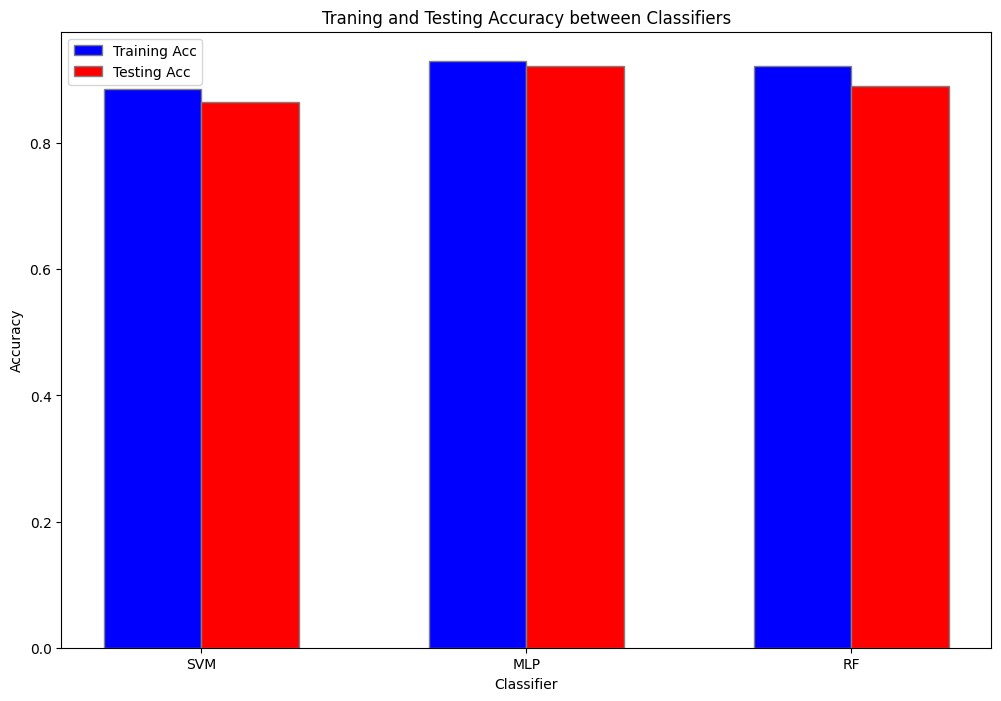

In [14]:
barWidth = 0.30
fig = plt.subplots(figsize = (12, 8)) 
 
# Set position of bar on X axis 
br1 = np.arange(len(training_accuracy)) 
br2 = [x + barWidth for x in br1] 
 
# Make the plot
plt.bar(br1, training_accuracy, color ='blue', width = barWidth, 
        edgecolor ='grey', label ='Training Acc') 
plt.bar(br2, testing_accuracy, color ='red', width = barWidth, 
        edgecolor ='grey', label ='Testing Acc') 
 
# Adding Xticks 
plt.xlabel('Classifier') 
plt.ylabel('Accuracy') 
plt.xticks([r + 0.15 for r in range(len(training_accuracy))], 
        ['SVM', 'MLP', 'RF'])
plt.title("Traning and Testing Accuracy between Classifiers")
 
plt.legend()
plt.show() 

## F1 Score between All Classifiers

In [12]:
from sklearn.metrics import f1_score

svm_train_f1_score = f1_score(y_train, svm_y_train_predict)
svm_test_f1_score = f1_score(y_test, svm_y_test_predict)

mlp_train_f1_score = f1_score(y_train, mlp_y_train_predict)
mlp_test_f1_score = f1_score(y_test, mlp_y_test_predict)

rf_train_f1_score = f1_score(y_train, rf_y_train_predict)
rf_test_f1_score = f1_score(y_test, rf_y_test_predict)

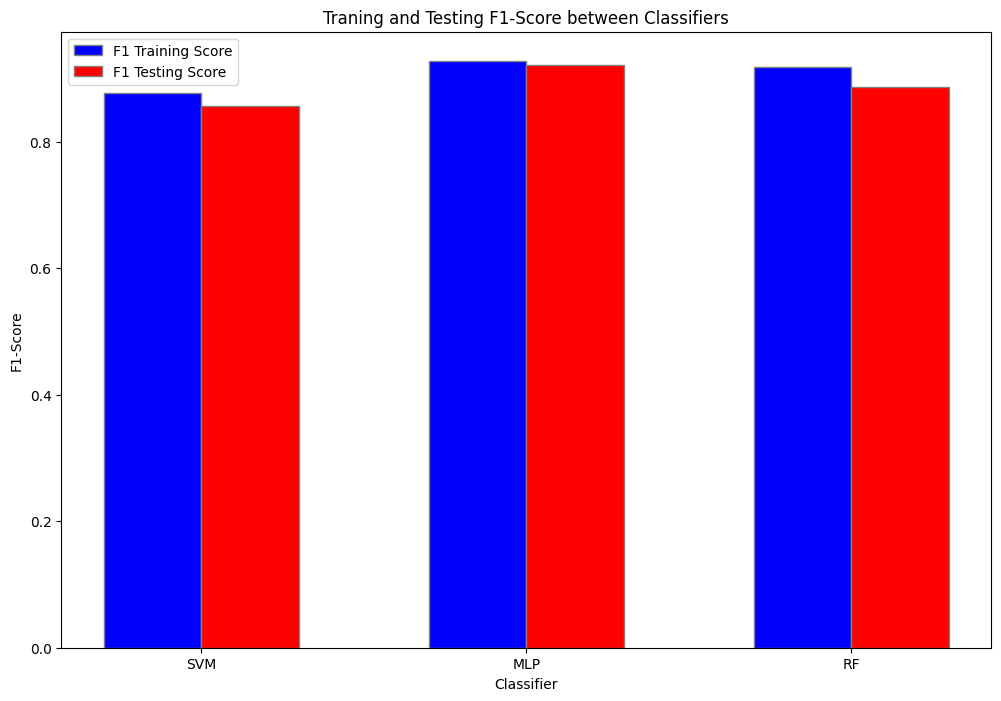

In [17]:
barWidth = 0.30
fig = plt.subplots(figsize = (12, 8)) 
 
# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 
 
# Make the plot
plt.bar(br1, [svm_train_f1_score, mlp_train_f1_score, rf_train_f1_score], color ='blue', width = barWidth, 
        edgecolor ='grey', label ='F1 Training Score') 
plt.bar(br2, [svm_test_f1_score, mlp_test_f1_score, rf_test_f1_score], color ='red', width = barWidth, 
        edgecolor ='grey', label ='F1 Testing Score') 
 
# Adding Xticks 
plt.xlabel('Classifier') 
plt.ylabel('F1-Score') 
plt.xticks([r + 0.15 for r in range(3)], 
        ['SVM', 'MLP', 'RF'])
plt.title("Traning and Testing F1-Score between Classifiers")
 
plt.legend()
plt.show() 

## Classifier Metrics

### SVM Classifier Metrics

In [6]:
svm_y_testing_pred = svm.predict(x_test)
svm_results = classifier_metrics(y_test, svm_y_testing_pred, print_results = True)

Accuracy: 0.8652380952380953
Precision: 0.8719343161216357
Recall: 0.8661182610024434
F1 Score: 0.8648088317718329
Mean Squared Error (MSE): 0.539047619047619
Matthews Correlation Coefficient (MCC): 0.7380296607199098
Cohen's Kappa: 0.7309164867645142
Hamming Loss: 0.13476190476190475

Confusion Matrix:
 [[5806  412]
 [1286 5096]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.82      0.93      0.87      6218
         1.0       0.93      0.80      0.86      6382

    accuracy                           0.87     12600
   macro avg       0.87      0.87      0.86     12600
weighted avg       0.87      0.87      0.86     12600





### MLP Classifier Metrics

In [7]:
mlp_y_testing_pred = mlp.predict(x_test)
mlp_results = classifier_metrics(y_test, mlp_y_testing_pred, print_results = True)

Accuracy: 0.9229365079365079
Precision: 0.9244016736401675
Recall: 0.9233439547682505
F1 Score: 0.9229078343708224
Mean Squared Error (MSE): 0.3082539682539683
Matthews Correlation Coefficient (MCC): 0.8477449685585702
Cohen's Kappa: 0.845976435575508
Hamming Loss: 0.07706349206349207

Confusion Matrix:
 [[5936  282]
 [ 689 5693]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.90      0.95      0.92      6218
         1.0       0.95      0.89      0.92      6382

    accuracy                           0.92     12600
   macro avg       0.92      0.92      0.92     12600
weighted avg       0.92      0.92      0.92     12600





### RF Classifier Metrics

In [8]:
rf_y_testing_pred = rf.predict(x_test)
rf_results = classifier_metrics(y_test, rf_y_testing_pred, print_results = True)

Accuracy: 0.89
Precision: 0.8923880194768727
Recall: 0.8905227481723031
F1 Score: 0.8899101307189543
Mean Squared Error (MSE): 0.44
Matthews Correlation Coefficient (MCC): 0.7829085456577812
Cohen's Kappa: 0.7802007156780288
Hamming Loss: 0.11

Confusion Matrix:
 [[5787  431]
 [ 955 5427]]

Classification Report:
               precision    recall  f1-score   support

        -1.0       0.86      0.93      0.89      6218
         1.0       0.93      0.85      0.89      6382

    accuracy                           0.89     12600
   macro avg       0.89      0.89      0.89     12600
weighted avg       0.89      0.89      0.89     12600





## Confusion Matrix

### SVM Confusion Matrix

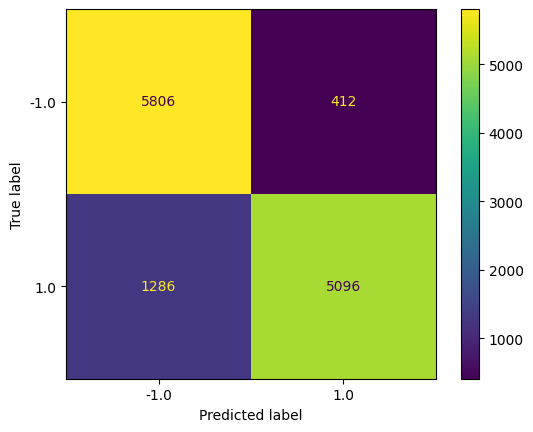

In [18]:
predictions = svm.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svm.classes_)
disp.plot()
plt.show()

### MLP Confusion Matrix

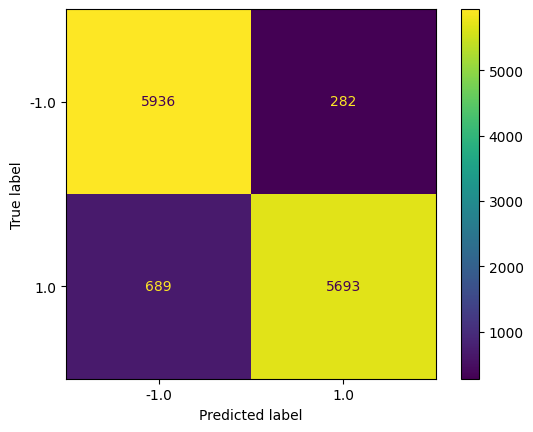

In [19]:
predictions = mlp.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = mlp.classes_)
disp.plot()
plt.show()

### RF Confusion Matrix

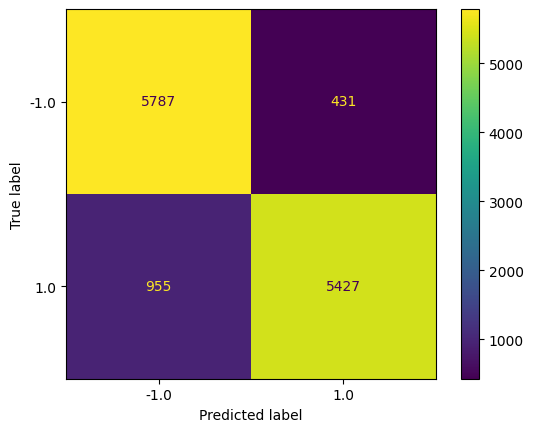

In [20]:
predictions = rf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf.classes_)
disp.plot()
plt.show()